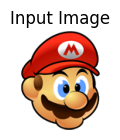

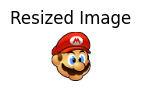

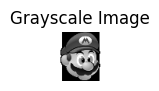

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os

directory = "./data/"  # 画像ディレクトリ
input_filename = "mario128.png"
output_filename = "mario_resized_64.png"  # リサイズ画像のファイル名

def resize_image(img, size=(64, 64)):
    # 画像をRGBAモードに変換
    img = img.convert("RGBA")

    # 元画像のサイズを取得
    width, height = img.size

    # リサイズ後の画像を格納する新しいImageオブジェクトを作成
    resized_img = Image.new("RGBA", size)

    # リサイズのためのスケールファクターを計算
    x_scale = width / size[0]
    y_scale = height / size[1]

    # 最近傍補間によりリサイズ
    # この部分を実装
    for y in range(size[1]):
        for x in range(size[0]):
            # リサイズ後の座標から元画像の座標を計算
            src_x = int(x * x_scale)
            src_y = int(y * y_scale)

            resized_img.putpixel((x, y), img.getpixel((src_x, src_y)))

    return resized_img

# 画像を読み込む
img = Image.open(os.path.join(directory, input_filename))

# 画像をリサイズする
resized_img = resize_image(img)

# リサイズ画像を保存する
resized_img.save(os.path.join(directory, output_filename))

# 入力画像を表示する
plt.figure(figsize=(img.size[0] / plt.rcParams["figure.dpi"], img.size[1] / plt.rcParams["figure.dpi"]))
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# リサイズ後の画像を表示する
plt.figure(figsize=(resized_img.size[0] / plt.rcParams["figure.dpi"], resized_img.size[1] / plt.rcParams["figure.dpi"]))
plt.imshow(resized_img)
plt.axis("off")
plt.title("Resized Image")
plt.show()

def to_grayscale_with_loop(img):
    img = img.convert("RGBA")
    width, height = img.size
    grayscale_img = Image.new("L", img.size)
    pixels = img.load()
    for y in range(height):
        for x in range(width):
            r, g, b, a = pixels[x, y]
            gray_value = int(0.2989 * r + 0.5870 * g + 0.1140 * b)  # グレースケール変換の計算式
            grayscale_img.putpixel((x, y), gray_value)
    return grayscale_img

# リサイズ後の画像をグレースケールに変換して表示する
# grayscale_image = resized_img.convert("L")
grayscale_image = to_grayscale_with_loop(resized_img)
plt.figure(figsize=(grayscale_image.size[0] / plt.rcParams["figure.dpi"], grayscale_image.size[1] / plt.rcParams["figure.dpi"]))
plt.imshow(grayscale_image, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()